In [18]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [4]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model


In [6]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = 'acc')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [8]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


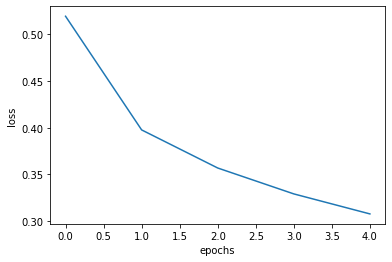

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

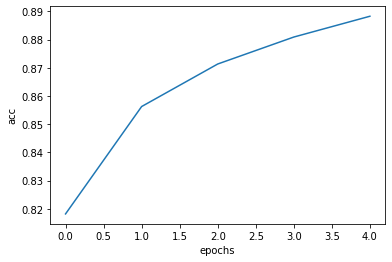

In [10]:
plt.plot(history.history['acc'])
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()

In [11]:
def model_plt(history, ylabel):
  plt.plot(history[ylabel])
  plt.xlabel('epoch')
  plt.ylabel(ylabel)
  plt.show()

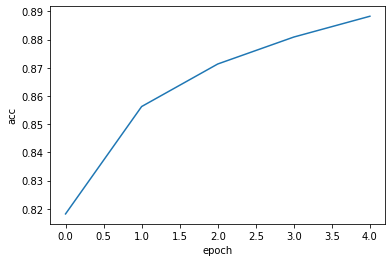

In [13]:
model_plt(history.history, 'acc')

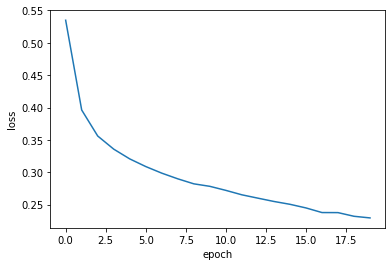

In [14]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'acc')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)
model_plt(history.history, 'loss')

In [24]:
def comp_model(model, optimizer = None):
  if optimizer:
    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = 'acc')
  else:
    model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'acc')

In [19]:
model = model_fn()
comp_model(model)
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

In [20]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [21]:
def plt_model_val(history, ylabel = 'loss'):
  val_ylabel = 'val_' + ylabel
  plt.plot(history[ylabel])
  plt.plot(history[val_ylabel])
  plt.xlabel('epoch')
  plt.ylabel(ylabel)
  plt.legend(['train', 'val'])
  plt.show()

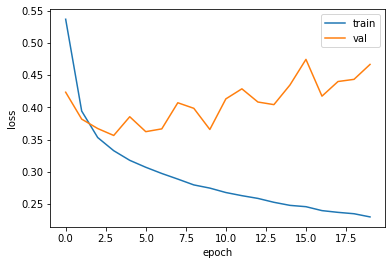

In [22]:
plt_model_val(history.history)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5258 - acc: 0.8163 - val_loss: 0.4494 - val_acc: 0.8397
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3952 - acc: 0.8573 - val_loss: 0.3818 - val_acc: 0.8637
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3546 - acc: 0.8695 - val_loss: 0.3730 - val_acc: 0.8649
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3227 - acc: 0.8813 - val_loss: 0.3652 - val_acc: 0.8706
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3046 - acc: 0.8881 - val_loss: 0.3546 - val_acc: 0.8706
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2906 - acc: 0.8930 - val_loss: 0.3403 - val_acc: 0.8797
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2782 - acc: 0.8969 - val_loss: 0.3328 - val_acc: 0.8808
Epoch 8/20
1500/1500 [==============================] - 4s 3ms

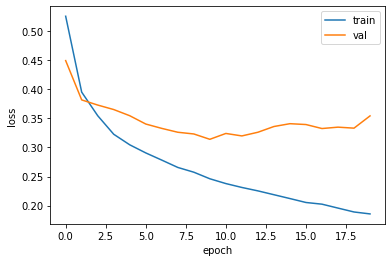

In [25]:
model = model_fn()
comp_model(model, 'adam')
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))
plt_model_val(history.history)

In [26]:
#Dropout 추가
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5899 - acc: 0.7938 - val_loss: 0.4306 - val_acc: 0.8440
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4420 - acc: 0.8410 - val_loss: 0.3923 - val_acc: 0.8575
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4051 - acc: 0.8530 - val_loss: 0.3607 - val_acc: 0.8695
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3813 - acc: 0.8609 - val_loss: 0.3759 - val_acc: 0.8649
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3662 - acc: 0.8651 - val_loss: 0.3447 - val_acc: 0.8761
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3533 - acc: 0.8701 - val_loss: 0.3464 - val_acc: 0.8717
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3436 - acc: 0.8729 - val_loss: 0.3307 - val_acc: 0.8820
Epoch 8/20
1500/1500 [==============================] - 4s 3ms

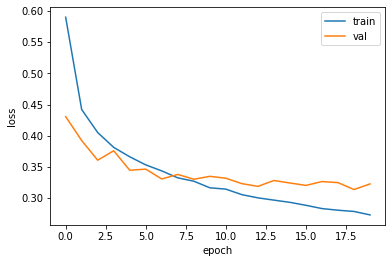

In [28]:
comp_model(model, 'adam')
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))
plt_model_val(history.history)

In [30]:
model = model_fn(keras.layers.Dropout(0.3))
comp_model(model, 'adam')
history = model.fit(train_scaled, train_target, epochs = 10, validation_data= (val_scaled, val_target))

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5878 - acc: 0.7924 - val_loss: 0.4175 - val_acc: 0.8472
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4407 - acc: 0.8412 - val_loss: 0.3936 - val_acc: 0.8576
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4028 - acc: 0.8530 - val_loss: 0.3733 - val_acc: 0.8608
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3827 - acc: 0.8612 - val_loss: 0.3573 - val_acc: 0.8703
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3647 - acc: 0.8658 - val_loss: 0.3506 - val_acc: 0.8739
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3534 - acc: 0.8715 - val_loss: 0.3500 - val_acc: 0.8743
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3462 - acc: 0.8719 - val_loss: 0.3389 - val_acc: 0.8752
Epoch 8/10
1500/1500 [==============================] - 4s 3ms

In [31]:
model.save_weights('model-weights.h5')

In [32]:
model.save('model-whole.h5')

In [33]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Aug 15 03:35 model-weights.h5
-rw-r--r-- 1 root root 982664 Aug 15 03:35 model-whole.h5


In [34]:
model = model_fn(keras.layers.Dropout(0,3))
model.load_weights('model-weights.h5')

In [35]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

0.8844166666666666


In [36]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3254 - acc: 0.8844


[0.3254254460334778, 0.8844166398048401]

In [37]:
model = model_fn(keras.layers.Dropout(0.3))
comp_model(model, 'adam')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs = 20,
          validation_data = (val_scaled, val_target),
          callbacks = [checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5938 - acc: 0.7928 - val_loss: 0.4163 - val_acc: 0.8524
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4410 - acc: 0.8427 - val_loss: 0.3915 - val_acc: 0.8577
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4017 - acc: 0.8539 - val_loss: 0.3624 - val_acc: 0.8701
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3825 - acc: 0.8602 - val_loss: 0.3587 - val_acc: 0.8676
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3651 - acc: 0.8664 - val_loss: 0.3443 - val_acc: 0.8712
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3534 - acc: 0.8700 - val_loss: 0.3448 - val_acc: 0.8725
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3415 - acc: 0.8747 - val_loss: 0.3312 - val_acc: 0.8767
Epoch 8/20
1500/1500 [==============================] - 6s 4ms

In [38]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3344 - acc: 0.8822


[0.3343838155269623, 0.8821666836738586]

In [40]:
model = model_fn(keras.layers.Dropout(0.3))
comp_model(model, 'adam')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), 
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5944 - acc: 0.7908 - val_loss: 0.4228 - val_acc: 0.8472
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4417 - acc: 0.8412 - val_loss: 0.4073 - val_acc: 0.8477
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4040 - acc: 0.8525 - val_loss: 0.3762 - val_acc: 0.8620
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3833 - acc: 0.8606 - val_loss: 0.3580 - val_acc: 0.8709
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3681 - acc: 0.8644 - val_loss: 0.3456 - val_acc: 0.8753
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3559 - acc: 0.8696 - val_loss: 0.3401 - val_acc: 0.8777
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3452 - acc: 0.8725 - val_loss: 0.3308 - val_acc: 0.8805
Epoch 8/20
1500/1500 [==============================] - 4s 3ms

In [41]:
print(early_stopping_cb.stopped_epoch)

8


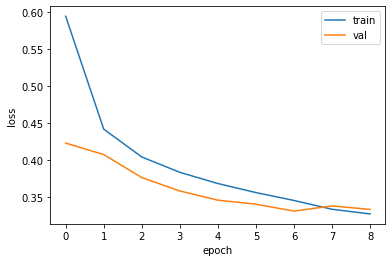

In [42]:
plt_model_val(history.history)

In [43]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3308 - acc: 0.8805


[0.3307950496673584, 0.8805000185966492]